## Observations and Insights 

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [71]:
# Checking the number of mice in the DataFrame.
total_mice = len((merge_df["Mouse ID"]).unique())

total_mice

249

In [233]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merge_df.groupby('Mouse ID')['Timepoint'].nunique()

duplicateids = merge_df.loc[merge_df.duplicated(subset = ['Mouse ID','Timepoint']), 'Mouse ID'].unique()

duplicateids

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_df = merge_df[merge_df['Mouse ID'] != 'g989']

mouse_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [97]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = len((mouse_clean_df["Mouse ID"]).unique())

total_mice_clean

248

## Summary Statistics

In [109]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sort_gb = mouse_clean_df.groupby("Drug Regimen")
tum_mean = sort_gb["Tumor Volume (mm3)"].mean()
tum_median = sort_gb["Tumor Volume (mm3)"].median()
tum_var = sort_gb["Tumor Volume (mm3)"].var()
tum_std = sort_gb["Tumor Volume (mm3)"].std()
tum_sem = sort_gb["Tumor Volume (mm3)"].sem()

tum_merge = pd.merge(tum_mean, tum_median, on="Drug Regimen")
tum_merge = pd.merge(tum_merge, tum_var, on="Drug Regimen")
tum_merge = pd.merge(tum_merge, tum_std, on="Drug Regimen")
tum_merge = pd.merge(tum_merge, tum_sem, on="Drug Regimen")

tum_merge.columns = ['Mean Tumor Volume', 'Median Tumor Volume',
                    'Tumor Volume Variance', 'Tumor Volume Std Dev',
                    'Tumor Volume Std Err']

tum_merge

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0, 0.5, 'Data Points')

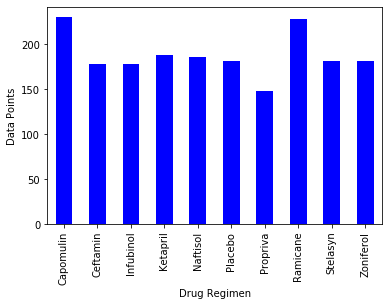

In [177]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
grouped = mouse_clean_df.groupby(['Drug Regimen']).count()['Mouse ID']

grouped.plot(kind='bar', color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

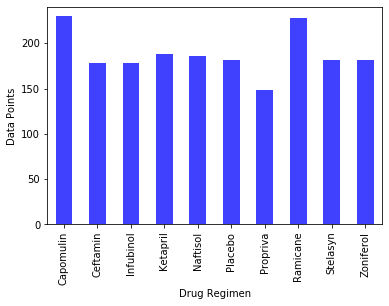

In [178]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
import numpy as np

num_of_mice = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Ramicane', 'Stelasyn', 'Zoniferol']

x_axis = np.arange(len(grouped))

plt.bar(x_axis, num_of_mice, color='b', width=0.5, alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
                            'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.5, len(x_axis)-0.5)

plt.ylim(0, max(num_of_mice)+10)

plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

width = 0.1

## Pie Plots

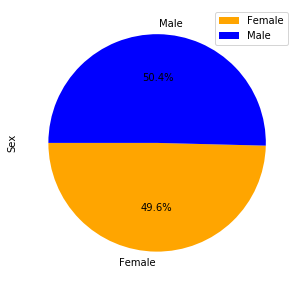

In [234]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender = mouse_clean_df.groupby(["Mouse ID","Sex"])
groupby_gender

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Sex"]

#gender_df
mouse_gender

plot = mouse_gender.plot.pie(y='Sex',figsize=(5,5),
                             colors = ['orange', 'blue'], startangle=180, autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

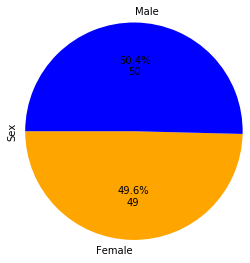

In [227]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_of_mice = [49.6, 50.4]
gender = ['Female', 'Male']
colors = ['orange', 'blue']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(count_of_mice, autopct=lambda pct: func(pct, count_of_mice)
                                  , labels=gender, colors=colors, startangle=180, radius=1.25)

ax.set_ylabel("Sex", labelpad=8)

## Quartiles, Outliers and Boxplots

In [220]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
best_treatments = mouse_clean_df[mouse_clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_treatments = best_treatments.sort_values(["Timepoint"], ascending=True)
best_treatments

best_treatments_data = best_treatments[["Drug Regimen", 
                                        "Mouse ID", 
                                        "Timepoint", 
                                        "Tumor Volume (mm3)"]]

best_treatments_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


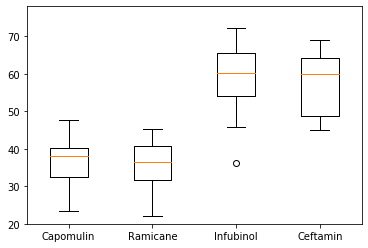

In [235]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
best_treatments_sort = best_treatments_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_treatments_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_treatments_df = best_treatments_sort.to_frame()
best_treatments_df

#Create a list to use as labels and dataframe
best_drugs_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_treatments_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(best_drugs_list)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
dict(markerfacecolor='red', markersize=12)
plt.boxplot(tumor_vols, labels=best_drugs_list)
plt.ylim(20, 78)
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
